In [1]:
!pip freeze | grep scikit-optimize
!pip freeze | grep skops
!pip freeze | grep scikit-learn


scikit-learn==1.2.2


In [2]:

# !pip uninstall scikit-learn
# !pip uninstall skops
# !pip uninstall scikit-optimize
# !pip install scikit-learn==0.24.2 #1.0.2
# !pip install skops==0.24.2 #0.4.0
# !pip install scikit-optimize==0.8.1

In [3]:
!pip install skops
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.6 MB/s eta 0:00:00


In [4]:
!pip freeze | grep scikit-optimize
!pip freeze | grep skops
!pip freeze | grep scikit-learn


scikit-optimize==0.10.2
skops==0.10.0
scikit-learn==1.2.2


In [5]:
import skops.io as sio

In [49]:
import skops.io as sio
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MaxAbsScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline, make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import VotingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.metrics as metrics
from skopt import BayesSearchCV

In [7]:
# Function to preprocess the dataset
def preprocess_dataset(df):
    df = df.applymap(lambda x: x.replace("'", "") if isinstance(x, str) else x)
    return df

In [9]:
# Load the dataset
df = pd.read_csv('Risk_Dataset_Final_Dataset.csv')
# Rename columns
df.rename(columns={'Fix Cost (\% of Project)': 'Fix Cost'}, inplace=True)

In [10]:
df.head(10)

,Requirements,project Category,Requirement Category,Risk Target Category,Probability,Magnitude of Risk,Impact,Dimension of Risk,Afftecting No of Modules,Fixing Duration (Days),Fix Cost,Priority,Risk Level
0,'The system shall display all the products tha...,'Transaction Processing System',Functional,Budget,10,Negligible,high,Requirements,9,1,10,95.715385,5
1,'The system shall allow user to select the pro...,'Transaction Processing System',Functional,Quality,22,'Very Low',catastrophic,Requirements,7,2,11,35.900000,2
2,'The system shall display all the available co...,'Transaction Processing System',Functional,Schedule,33,Low,high,User,5,1,3,35.692308,2
3,'The system shall enable user to add one or mo...,'Transaction Processing System',Functional,Personal,40,Medium,moderate,'Project complexity',8,3,2,44.100000,3
4,'The system shall notify the user about any co...,'Transaction Processing System',Functional,Budget,100,High,Low,'planning and control',4,2,1,85.776923,5
5,'The system shall allow user to update the con...,'Transaction Processing System',Functional,Performance,55,'Very High',insignificant,Team,6,4,4,56.453846,3
6,'The system shall allow user to confirm the co...,'Transaction Processing System',Functional,FunctionalValidity,44,Extreme,moderate,'Organizational Environment',2,1,2,41.530769,3
7,'The system shall display detailed information...,'Transaction Processing System',Functional,Performance,67,High,high,User,5,2,1,61.261538,3
8,'The system shall provide browsing options to ...,'Transaction Processing System',Functional,FunctionalValidity,23,Medium,moderate,'Project complexity',4,3,2,28.284615,2
9,'The system shall display detailed product cat...,'Transaction Processing System',Functional,Performance,12,Negligible,Low,User,3,4,1,18.223077,1


In [11]:
# Preprocess the dataset
df = preprocess_dataset(df)

In [23]:
df.head(10)

,Requirements,project Category,Requirement Category,Risk Target Category,Probability,Magnitude of Risk,Impact,Dimension of Risk,Afftecting No of Modules,Fixing Duration (Days),Fix Cost,Priority,Risk Level
0,The system shall display all the products that...,Transaction Processing System,Functional,Budget,10,Negligible,high,Requirements,9,1,10,95.715385,5
1,The system shall allow user to select the prod...,Transaction Processing System,Functional,Quality,22,Very Low,catastrophic,Requirements,7,2,11,35.900000,2
2,The system shall display all the available com...,Transaction Processing System,Functional,Schedule,33,Low,high,User,5,1,3,35.692308,2
3,The system shall enable user to add one or mor...,Transaction Processing System,Functional,Personal,40,Medium,moderate,Project complexity,8,3,2,44.100000,3
4,The system shall notify the user about any con...,Transaction Processing System,Functional,Budget,100,High,Low,planning and control,4,2,1,85.776923,5
5,The system shall allow user to update the conf...,Transaction Processing System,Functional,Performance,55,Very High,insignificant,Team,6,4,4,56.453846,3
6,The system shall allow user to confirm the com...,Transaction Processing System,Functional,FunctionalValidity,44,Extreme,moderate,Organizational Environment,2,1,2,41.530769,3
7,The system shall display detailed information ...,Transaction Processing System,Functional,Performance,67,High,high,User,5,2,1,61.261538,3
8,The system shall provide browsing options to s...,Transaction Processing System,Functional,FunctionalValidity,23,Medium,moderate,Project complexity,4,3,2,28.284615,2
9,The system shall display detailed product cate...,Transaction Processing System,Functional,Performance,12,Negligible,Low,User,3,4,1,18.223077,1


In [39]:
# Data Preprocessing
df.replace('?', np.nan, inplace=True)
df.fillna(method='ffill', inplace=True)
X = df.drop(['Risk Level'], axis=1)
y = df['Risk Level']

In [41]:
X.head(10)

,Requirements,project Category,Requirement Category,Risk Target Category,Probability,Magnitude of Risk,Impact,Dimension of Risk,Afftecting No of Modules,Fixing Duration (Days),Fix Cost,Priority
0,The system shall display all the products that...,Transaction Processing System,Functional,Budget,10,Negligible,high,Requirements,9,1,10,95.715385
1,The system shall allow user to select the prod...,Transaction Processing System,Functional,Quality,22,Very Low,catastrophic,Requirements,7,2,11,35.900000
2,The system shall display all the available com...,Transaction Processing System,Functional,Schedule,33,Low,high,User,5,1,3,35.692308
3,The system shall enable user to add one or mor...,Transaction Processing System,Functional,Personal,40,Medium,moderate,Project complexity,8,3,2,44.100000
4,The system shall notify the user about any con...,Transaction Processing System,Functional,Budget,100,High,Low,planning and control,4,2,1,85.776923
5,The system shall allow user to update the conf...,Transaction Processing System,Functional,Performance,55,Very High,insignificant,Team,6,4,4,56.453846
6,The system shall allow user to confirm the com...,Transaction Processing System,Functional,FunctionalValidity,44,Extreme,moderate,Organizational Environment,2,1,2,41.530769
7,The system shall display detailed information ...,Transaction Processing System,Functional,Performance,67,High,high,User,5,2,1,61.261538
8,The system shall provide browsing options to s...,Transaction Processing System,Functional,FunctionalValidity,23,Medium,moderate,Project complexity,4,3,2,28.284615
9,The system shall display detailed product cate...,Transaction Processing System,Functional,Performance,12,Negligible,Low,User,3,4,1,18.223077


In [42]:
categorical_columns = ['project Category', 'Requirement Category', 'Risk Target Category', 'Magnitude of Risk', 'Impact', 'Dimension of Risk', 'Fix Cost']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

In [50]:
if 'Requirements' in X.columns:
    print(" dsflksdjflksdjflksdjlkfmsdlkfmsdfdsf")
    tfidf_vectorizer = TfidfVectorizer()
    X_requirements = tfidf_vectorizer.fit_transform(X['Requirements'])
    X = X.drop('Requirements', axis=1)
    X = pd.concat([X.reset_index(drop=True), pd.DataFrame(X_requirements.toarray())], axis=1)
else :
  print("dsf")

dsf


In [51]:
# # Use the SVM model to generate features
# X_requirements_svm = svm_model.predict_proba(X_requirements)

In [52]:
# # Drop the original 'Requirements' column and add the SVM-generated features
# X = X.drop('Requirements', axis=1)
# X = pd.concat([X.reset_index(drop=True), pd.DataFrame(X_requirements_svm)], axis=1)

In [53]:
# Stratified train-test split with check
def stratified_train_test_split(X, y, test_size=0.2, random_state=7):
    while True:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)
        if len(np.unique(y_test)) == len(np.unique(y)):
            break
        random_state += 1
    return X_train, X_test, y_train, y_test

In [54]:
X_train, X_test, y_train, y_test = stratified_train_test_split(X, y, test_size=0.2, random_state=123)
# Convert column names to strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)
# Scale the data
scaler = MaxAbsScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
# Train SVM on Requirements
svm_model = make_pipeline(MaxAbsScaler(), SVC(probability=True, random_state=42))
svm_model.fit(X_requirements, y)

Pipeline(steps=[('maxabsscaler', MaxAbsScaler()),
                ('svc', SVC(probability=True, random_state=42))])

In [60]:
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Classification Report
    print(f"Classification Report - {model_name}")
    print(classification_report(y_test, y_pred))

    # ROC Curve
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(len(np.unique(y_test))):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])
    plt.figure()
    for i in range(len(np.unique(y_test))):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:0.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

    # Precision-Recall Curve
    precision_curve = {}
    recall_curve = {}
    for i in range(len(np.unique(y_test))):
        precision_curve[i], recall_curve[i], _ = precision_recall_curve(y_test, y_pred_proba[:, i], pos_label=i)
    plt.figure()
    for i in range(len(np.unique(y_test))):
        plt.plot(recall_curve[i], precision_curve[i], label=f'Class {i}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend(loc="lower left")
    plt.show()

    return accuracy, precision, recall, f1, auc_score

In [61]:
# # Baseline Models
# models = {
#     'Logistic Regression': LogisticRegression(multi_class='ovr', solver='liblinear'),
#     'Decision Tree': DecisionTreeClassifier(),
#     'Random Forest': RandomForestClassifier(),
#     'Gradient Boosting': GradientBoostingClassifier(),
#     'Naive Bayes': GaussianNB(),
#     'K-Nearest Neighbors': KNeighborsClassifier()
# }

# # Train and evaluate baseline models
# baseline_results = {}
# for name, model in models.items():
#     results = evaluate_model(model, name)
#     baseline_results[name] = results

In [62]:
# # Display baseline results
# baseline_df = pd.DataFrame(baseline_results, index=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']).T
# print(baseline_df)

In [63]:
# Parameter grids for hyperparameter tuning
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_nb = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 4, 5]
}

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 36 is smaller than n_iter=100. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


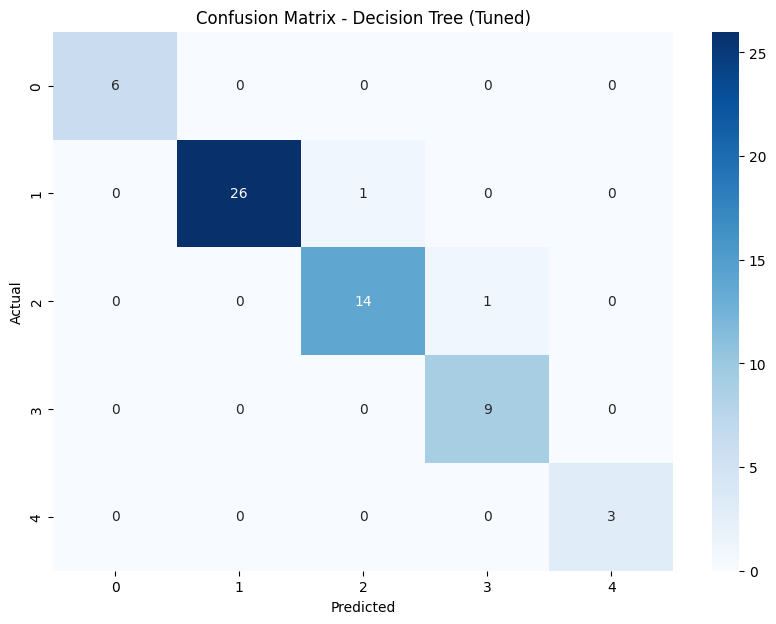

Classification Report - Decision Tree (Tuned)
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      0.96      0.98        27
           3       0.93      0.93      0.93        15
           4       0.90      1.00      0.95         9
           5       1.00      1.00      1.00         3

    accuracy                           0.97        60
   macro avg       0.97      0.98      0.97        60
weighted avg       0.97      0.97      0.97        60



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


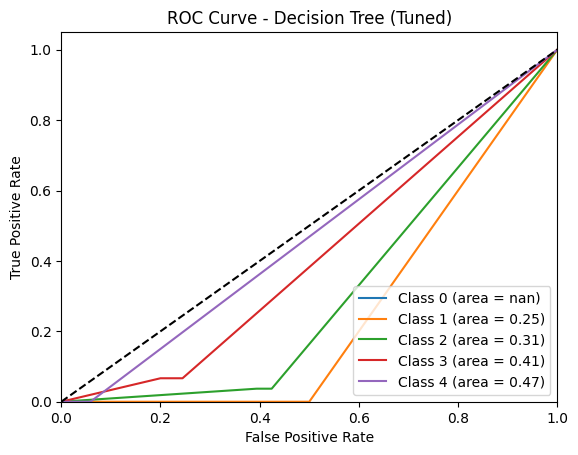

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


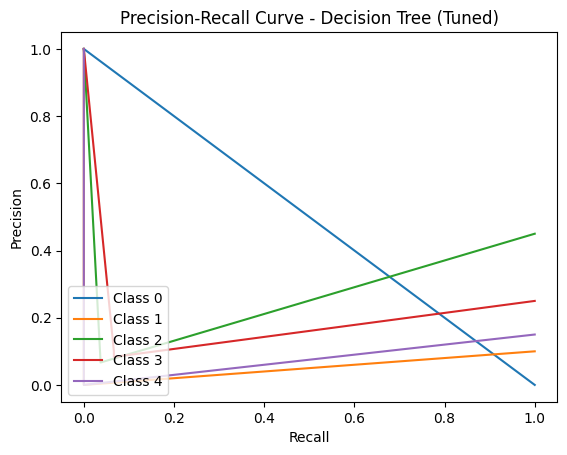

In [64]:
# RandomizedSearchCV for Decision Tree
random_search_dt = RandomizedSearchCV(estimator=DecisionTreeClassifier(), param_distributions=param_grid_dt, n_iter=100, cv=5, random_state=42)
random_search_dt.fit(X_train, y_train)
best_dt = random_search_dt.best_estimator_
best_dt_results = evaluate_model(best_dt, 'Decision Tree (Tuned)')

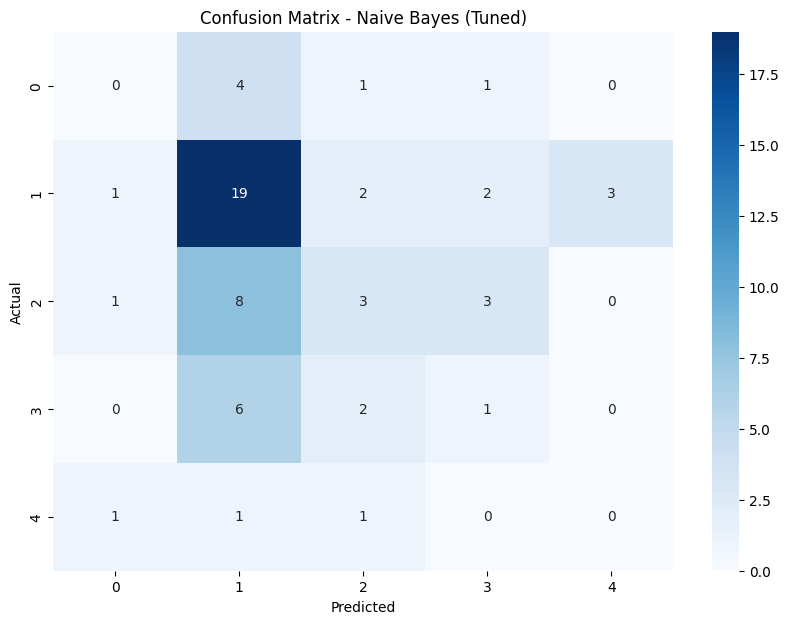

Classification Report - Naive Bayes (Tuned)
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.50      0.70      0.58        27
           3       0.33      0.20      0.25        15
           4       0.14      0.11      0.12         9
           5       0.00      0.00      0.00         3

    accuracy                           0.38        60
   macro avg       0.20      0.20      0.19        60
weighted avg       0.33      0.38      0.34        60



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


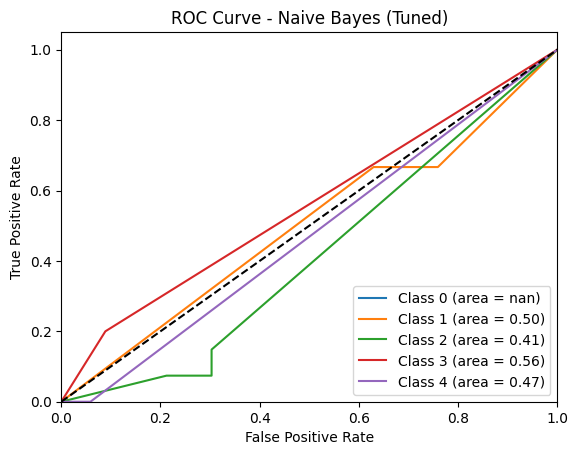

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


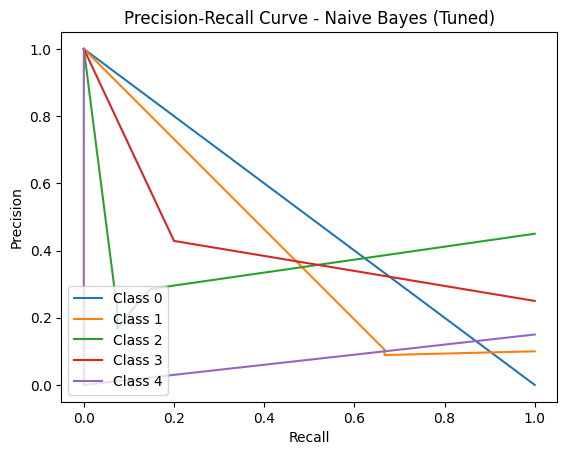

In [65]:
# RandomizedSearchCV for Naive Bayes
random_search_nb = RandomizedSearchCV(estimator=GaussianNB(), param_distributions=param_grid_nb, n_iter=100, cv=5, random_state=42)
random_search_nb.fit(X_train, y_train)
best_nb = random_search_nb.best_estimator_
best_nb_results = evaluate_model(best_nb, 'Naive Bayes (Tuned)')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


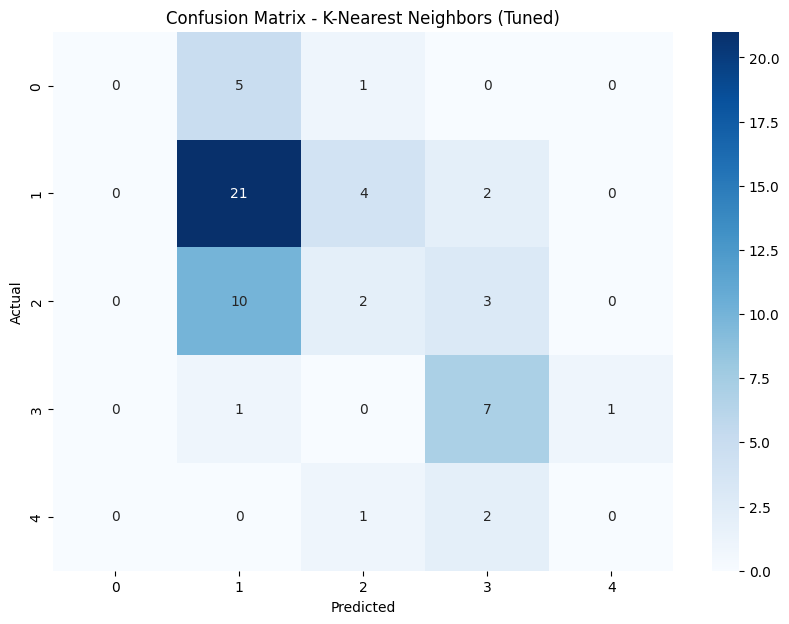

Classification Report - K-Nearest Neighbors (Tuned)
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.57      0.78      0.66        27
           3       0.25      0.13      0.17        15
           4       0.50      0.78      0.61         9
           5       0.00      0.00      0.00         3

    accuracy                           0.50        60
   macro avg       0.26      0.34      0.29        60
weighted avg       0.39      0.50      0.43        60



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking

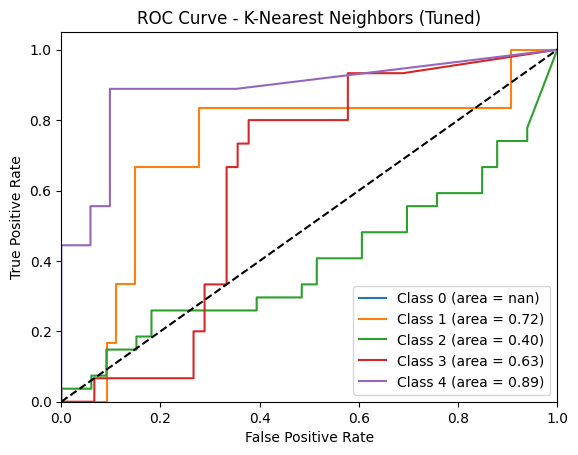

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


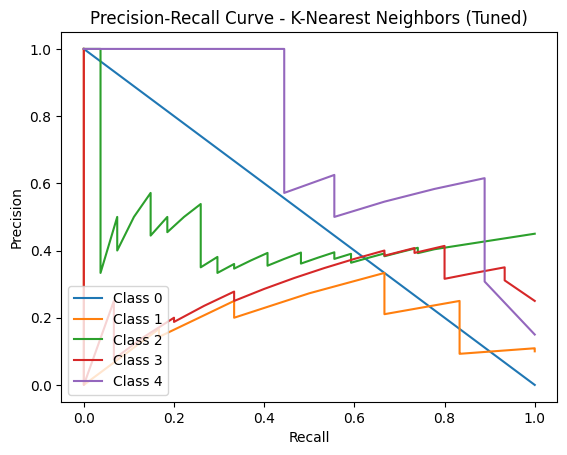

In [66]:
# RandomizedSearchCV for K-Nearest Neighbors
random_search_knn = RandomizedSearchCV(estimator=KNeighborsClassifier(), param_distributions=param_grid_knn, n_iter=100, cv=5, random_state=42)
random_search_knn.fit(X_train, y_train)
best_knn = random_search_knn.best_estimator_
best_knn_results = evaluate_model(best_knn, 'K-Nearest Neighbors (Tuned)')

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [None, 2, 100] before, using random point [10, 10, 100]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [20, 2, 100] before, using random point [10, 5, 200]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [20, 2, 100] before, using random point [20, 2, 300]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [None, 2, 100] before, using random point [None, 10, 200]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [20, 2, 300] before, using random point [30, 10, 200]
  warnings.wa

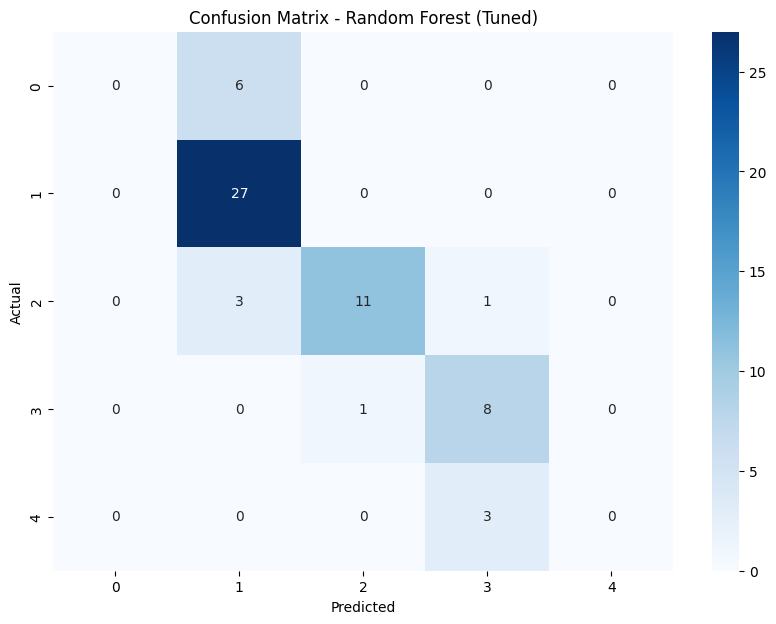

Classification Report - Random Forest (Tuned)
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.75      1.00      0.86        27
           3       0.92      0.73      0.81        15
           4       0.67      0.89      0.76         9
           5       0.00      0.00      0.00         3

    accuracy                           0.77        60
   macro avg       0.47      0.52      0.49        60
weighted avg       0.67      0.77      0.70        60



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking

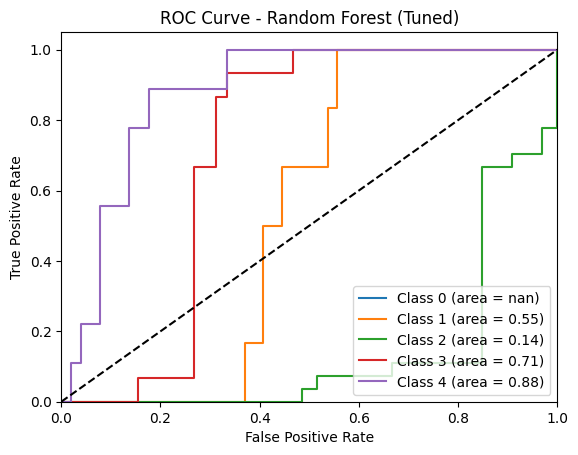

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


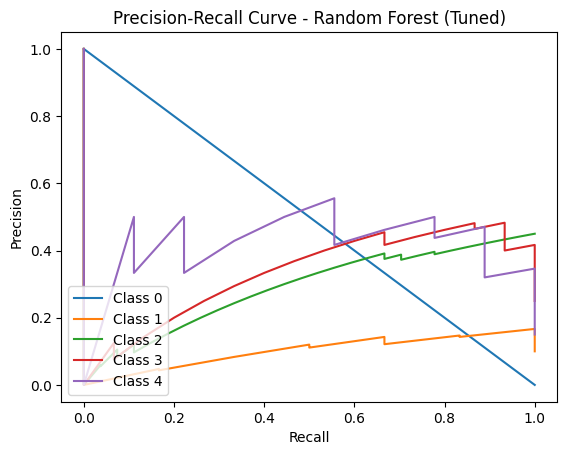

In [67]:
# BayesSearchCV for Random Forest
bayes_search_rf = BayesSearchCV(estimator=RandomForestClassifier(), search_spaces=param_grid_rf, n_iter=32, cv=5, random_state=42)
bayes_search_rf.fit(X_train, y_train)
best_rf = bayes_search_rf.best_estimator_
best_rf_results = evaluate_model(best_rf, 'Random Forest (Tuned)')

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1, 3, 300] before, using random point [0.05, 3, 200]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 5, 300] before, using random point [0.1, 3, 200]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1, 3, 300] before, using random point [0.01, 3, 200]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 5, 200] before, using random point [0.1, 5, 200]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 3, 200] before, using random point [0.1, 4, 300]
  warni

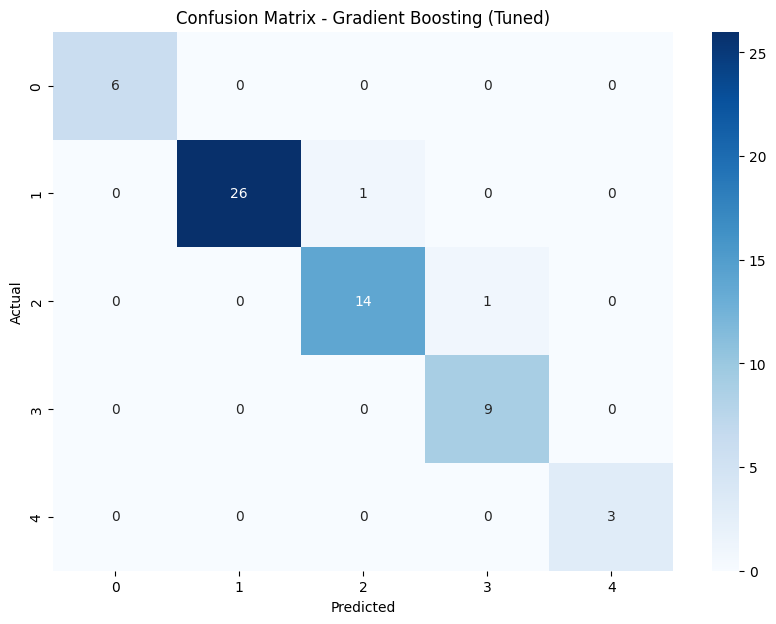

Classification Report - Gradient Boosting (Tuned)
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      0.96      0.98        27
           3       0.93      0.93      0.93        15
           4       0.90      1.00      0.95         9
           5       1.00      1.00      1.00         3

    accuracy                           0.97        60
   macro avg       0.97      0.98      0.97        60
weighted avg       0.97      0.97      0.97        60



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


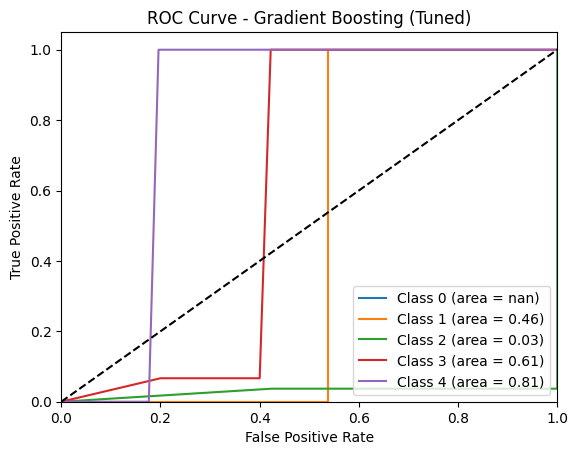

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


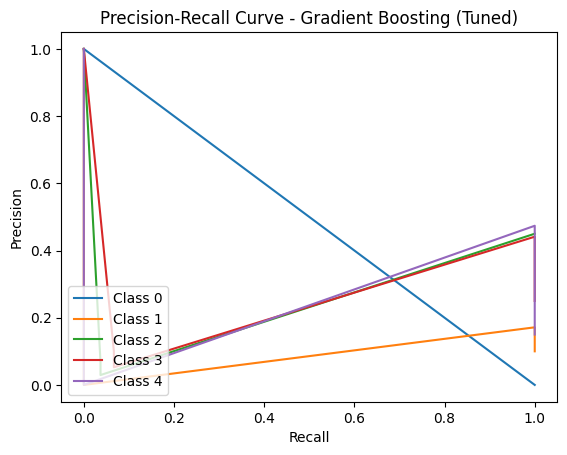

In [68]:
# BayesSearchCV for Gradient Boosting
bayes_search_gb = BayesSearchCV(estimator=GradientBoostingClassifier(), search_spaces=param_grid_gb, n_iter=32, cv=5, random_state=42)
bayes_search_gb.fit(X_train, y_train)
best_gb = bayes_search_gb.best_estimator_
best_gb_results = evaluate_model(best_gb, 'Gradient Boosting (Tuned)')

In [69]:
# # Ensemble Methods
# ensemble_model = VotingClassifier(estimators=[
#     ('rf', best_rf),
#     ('gb', best_gb),
#     ('dt', best_dt),
#     ('nb', best_nb),
#     ('knn', best_knn)
# ], voting='soft')
# ensemble_model.fit(X_train, y_train)
# ensemble_pred = ensemble_model.predict(X_test)

# Ensemble Methods
ensemble_model = VotingClassifier(estimators=[
    ('rf', best_rf),
    ('gb', best_gb),
    ('lr', LogisticRegression(multi_class='ovr', solver='liblinear'))
], voting='soft')
ensemble_model.fit(X_train, y_train)
ensemble_pred = ensemble_model.predict(X_test)

In [70]:
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
ensemble_precision = precision_score(y_test, ensemble_pred, average='weighted')
ensemble_recall = recall_score(y_test, ensemble_pred, average='weighted')
ensemble_f1 = f1_score(y_test, ensemble_pred, average='weighted')
ensemble_auc = roc_auc_score(y_test, ensemble_model.predict_proba(X_test), multi_class='ovr')

In [71]:
print(f"Ensemble Model Accuracy: {ensemble_accuracy}")
print(f"Ensemble Model Precision: {ensemble_precision}")
print(f"Ensemble Model Recall: {ensemble_recall}")
print(f"Ensemble Model F1 Score: {ensemble_f1}")
print(f"Ensemble Model AUC: {ensemble_auc}")

Ensemble Model Accuracy: 0.9333333333333333
Ensemble Model Precision: 0.9361904761904761
Ensemble Model Recall: 0.9333333333333333
Ensemble Model F1 Score: 0.9308931419457736
Ensemble Model AUC: 0.9976206509539842


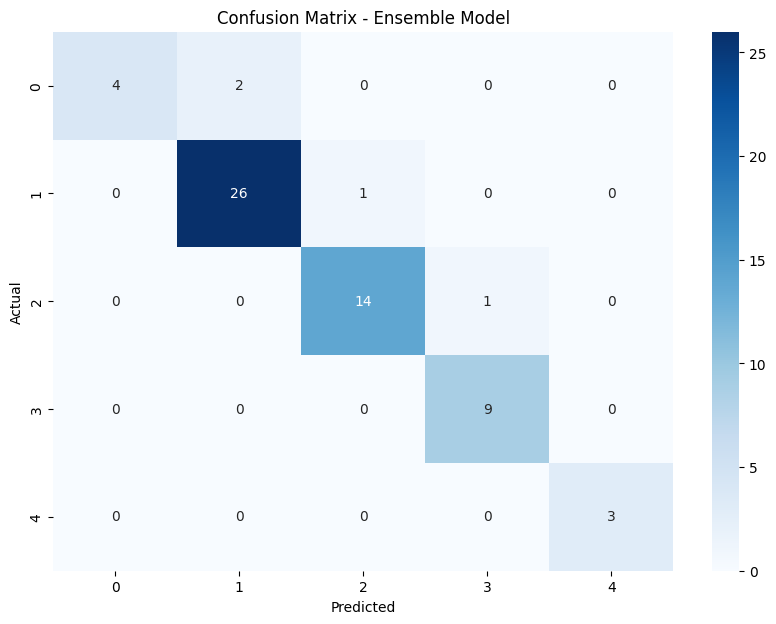

In [72]:
conf_matrix = confusion_matrix(y_test, ensemble_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix - Ensemble Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

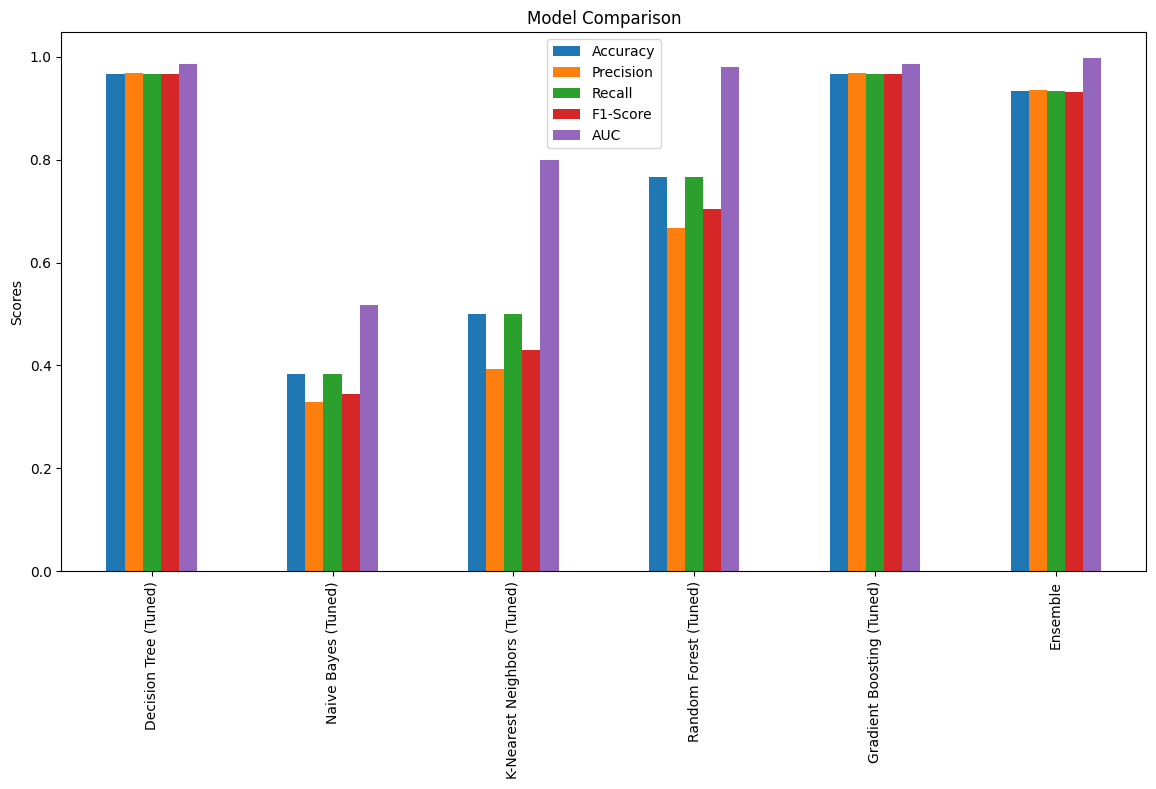

In [73]:
# Plotting accuracy, precision, recall, f1-score, and AUC for the models
results = {
    'Decision Tree (Tuned)': best_dt_results,
    'Naive Bayes (Tuned)': best_nb_results,
    'K-Nearest Neighbors (Tuned)': best_knn_results,
    'Random Forest (Tuned)': best_rf_results,
    'Gradient Boosting (Tuned)': best_gb_results,
    'Ensemble': [ensemble_accuracy, ensemble_precision, ensemble_recall, ensemble_f1, ensemble_auc]
}
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']).T
results_df.plot(kind='bar', figsize=(14, 7))
plt.title('Model Comparison')
plt.ylabel('Scores')
plt.show()

In [74]:
# Function to preprocess custom input
def preprocess_input(custom_input, scaler, label_encoders, tfidf_vectorizer, categorical_columns):
    custom_df = pd.DataFrame([custom_input])
    custom_df = custom_df.applymap(lambda x: x.replace("'", "") if isinstance(x, str) else x)

    for col in categorical_columns:
        if col in custom_df.columns:
            custom_df[col] = label_encoders[col].transform(custom_df[col].astype(str))

    if 'Requirements' in custom_df.columns:
        requirements_transformed = tfidf_vectorizer.transform(custom_df['Requirements'])
        custom_df = custom_df.drop('Requirements', axis=1)
        custom_df = pd.concat([custom_df.reset_index(drop=True), pd.DataFrame(requirements_transformed.toarray())], axis=1)

    custom_df.columns = custom_df.columns.astype(str)
    custom_input_scaled = scaler.transform(custom_df)
    return custom_input_scaled

In [75]:
# Example custom inputs
custom_input = {
    'Requirements': 'The system shall display all the available components of the product to configure',
    'project Category': 'Transaction Processing System',
    'Requirement Category': 'Functional',
    'Risk Target Category': 'Schedule',
    'Probability': 33,
    'Magnitude of Risk': 'Low',
    'Impact': 'high',
    'Dimension of Risk': 'User',
    'Afftecting No of Modules': 5,
    'Fixing Duration (Days)': 1,
    'Fix Cost': 3,
    'Priority': 99.692308
}


In [76]:
custom_input_2 = {
    'Requirements': 'The system shall display all the products that can be configured.',
    'project Category': 'Transaction Processing System',
    'Requirement Category': 'Functional',
    'Risk Target Category': 'Budget',
    'Probability': 10,
    'Magnitude of Risk': 'Negligible',
    'Impact': 'high',
    'Dimension of Risk': 'Requirements',
    'Afftecting No of Modules': 9,
    'Fixing Duration (Days)': 1,
    'Fix Cost': 10,
    'Priority': 1.715385
}

In [77]:
custom_input_3 = {
    'Requirements': 'The system shall display all the products that can be configured.',
    'project Category': 'Transaction Processing System',
    'Requirement Category': 'Functional',
    'Risk Target Category': 'Budget',
    'Probability': 100,
    'Magnitude of Risk': 'Low',
    'Impact': 'insignificant',
    'Dimension of Risk': 'Project complexity',
    'Afftecting No of Modules': 1,
    'Fixing Duration (Days)': 6,
    'Fix Cost': 5,
    'Priority': 45.5788
}

In [78]:
# Preprocess the custom inputs
preprocessed_input_1 = preprocess_input(custom_input, scaler, label_encoders, tfidf_vectorizer, categorical_columns)
preprocessed_input_2 = preprocess_input(custom_input_2, scaler, label_encoders, tfidf_vectorizer, categorical_columns)
preprocessed_input_3 = preprocess_input(custom_input_3, scaler, label_encoders, tfidf_vectorizer, categorical_columns)


In [79]:
# Predict the risk level using the ensemble model
predicted_risk_level_1 = ensemble_model.predict(preprocessed_input_1)
predicted_risk_level_2 = ensemble_model.predict(preprocessed_input_2)
predicted_risk_level_3 = ensemble_model.predict(preprocessed_input_3)

In [80]:
print(f"Predicted Risk Level 1: {predicted_risk_level_1[0]}")
print(f"Predicted Risk Level 2: {predicted_risk_level_2[0]}")
print(f"Predicted Risk Level 3: {predicted_risk_level_3[0]}")

Predicted Risk Level 1: 5
Predicted Risk Level 2: 1
Predicted Risk Level 3: 3


In [81]:
import pickle

# Save the model and preprocessors
with open('/content/drive/My Drive/Risk_Pickle_svm/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('/content/drive/My Drive/Risk_Pickle_svm/label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

with open('/content/drive/My Drive/Risk_Pickle_svm/tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

with open('/content/drive/My Drive/Risk_Pickle_svm/svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)

print("Model and preprocessors saved successfully.")


Model and preprocessors saved successfully.


In [82]:
# !pip show scikit-learn

In [83]:
# !pip uninstall scikit-learn

# !pip install scikit-learn==1.5.0


In [84]:
# !pip show scikit-optimize


In [85]:
# !pip install skops

In [86]:
# !pip show skops


In [87]:
# import skops.io as sio

# Load with the old version
with open('/content/drive/My Drive/Risk_Pickle_svm/svm_model.pkl', 'rb') as f:
  model = pickle.load(f)

# Save using skops
sio.dump(model, '/content/drive/My Drive/Risk_Pickle_svm/model.skops')


In [88]:
# sio.dump(model, '/content/drive/My Drive/Risk_Pickle/model2.skops', trusted=True)


In [89]:
from sklearn.utils import Bunch


In [90]:
from skops.io import dump, load, get_untrusted_types


In [91]:
unknown_types = get_untrusted_types(file="/content/drive/My Drive/Risk_Pickle_svm/model.skops")

In [92]:
model = sio.load('/content/drive/My Drive/Risk_Pickle_svm/model.skops', trusted=unknown_types)


In [93]:
# model = sio.load('/content/drive/My Drive/Risk_Pickle/model.skops')
